In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense, Bidirectional

In [ ]:
df = pd.read_csv('airline-passengers.csv', index_col=0)
df

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


<Axes: xlabel='Month'>

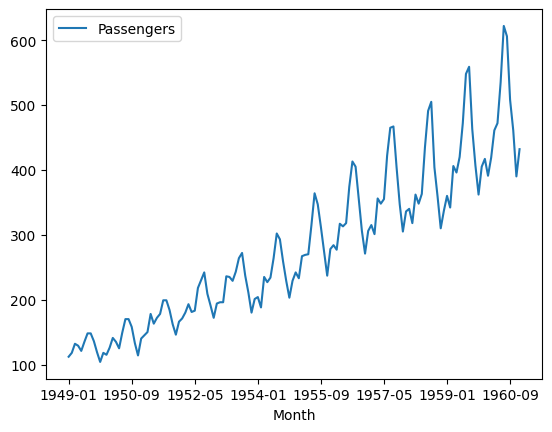

In [19]:
df.plot()

In [20]:
minv = df['Passengers'].min()
maxv = df['Passengers'].max()

df['Passengers'] = (df['Passengers'] - minv) / (maxv - minv)

df['Passengers2'] = df['Passengers'].shift(-1)
df = df[:-1]

df

,Passengers,Passengers2
Month,,
1949-01,0.015444,0.027027
1949-02,0.027027,0.054054
1949-03,0.054054,0.048263
1949-04,0.048263,0.032819
1949-05,0.032819,0.059846
...,...,...
1960-07,1.000000,0.969112
1960-08,0.969112,0.779923
1960-09,0.779923,0.689189


In [21]:
thr = int(len(df) * 0.7)
train_df = df[:thr]
test_df = df[thr:]

train_X = np.expand_dims(train_df['Passengers'].values, axis=(1,2))
train_Y = train_df['Passengers2'].values

test_X = np.expand_dims(test_df['Passengers'].values, axis=(1,2))
test_Y = test_df['Passengers2'].values

In [25]:
from tqdm import tqdm
import time
for i in tqdm(range(10)):
    pass
    time.sleep(1)

100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


In [26]:
from tqdm.keras import TqdmCallback

results = {}

for bdr in [True, False]:
    for model_type in [SimpleRNN, GRU, LSTM]:
        for units in [2, 8, 16]:
            
            model = Sequential()

            if bdr:
                model.add(Bidirectional(model_type(units, input_shape=(1, 1))))
            else:
                model.add(model_type(units, input_shape=(1, 1)))


            model.add(Dense(1))
            model.compile(loss='mean_squared_error', optimizer='adam')

            print(model_type.__name__, f'Bidirectional={bdr}', 'units:', units)
            model.fit(train_X, train_Y, epochs=25, batch_size=1, verbose=0, callbacks=[TqdmCallback(verbose=0)])

            train_pred = model.predict(train_X, verbose=0)
            test_pred = model.predict(test_X, verbose=0)

            results.setdefault(model_type.__name__, {}).setdefault(f'Bidirectional={bdr}', {})[units] = {'train_pred': train_pred, 'test_pred': test_pred}       

SimpleRNN Bidirectional=True units: 2


c:\Users\Roman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=True units: 8


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=True units: 16


0epoch [00:00, ?epoch/s]

GRU Bidirectional=True units: 2


0epoch [00:00, ?epoch/s]

GRU Bidirectional=True units: 8


0epoch [00:00, ?epoch/s]

GRU Bidirectional=True units: 16


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=True units: 2


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=True units: 8


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=True units: 16


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=False units: 2


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=False units: 8


0epoch [00:00, ?epoch/s]

SimpleRNN Bidirectional=False units: 16


0epoch [00:00, ?epoch/s]

GRU Bidirectional=False units: 2


0epoch [00:00, ?epoch/s]

GRU Bidirectional=False units: 8


0epoch [00:00, ?epoch/s]

GRU Bidirectional=False units: 16


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=False units: 2


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=False units: 8


0epoch [00:00, ?epoch/s]

LSTM Bidirectional=False units: 16


0epoch [00:00, ?epoch/s]

In [27]:
def renormalize(x):
    return x * (maxv - minv) + minv

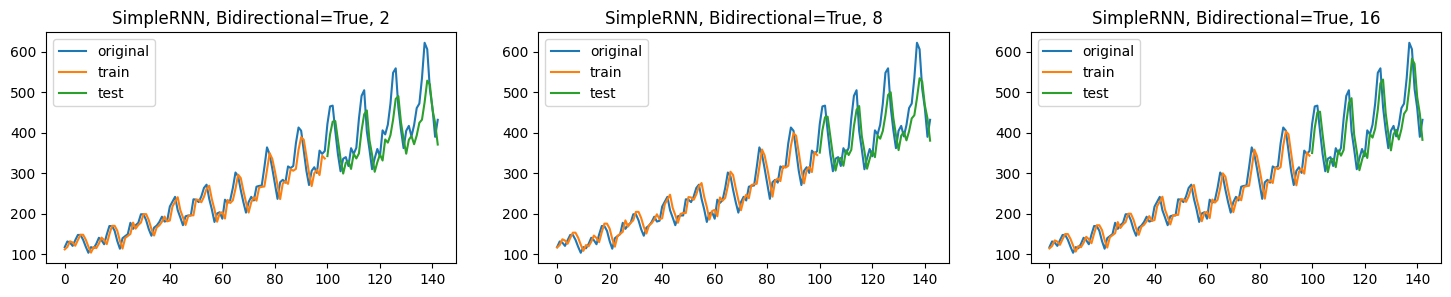

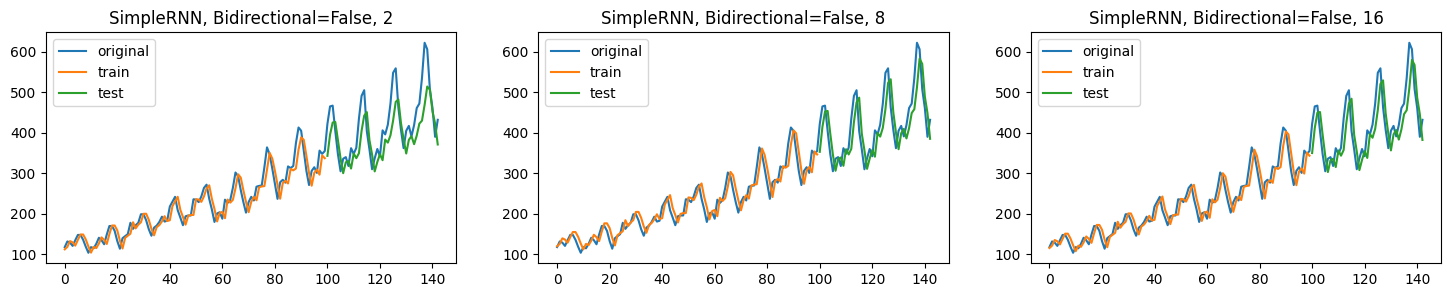

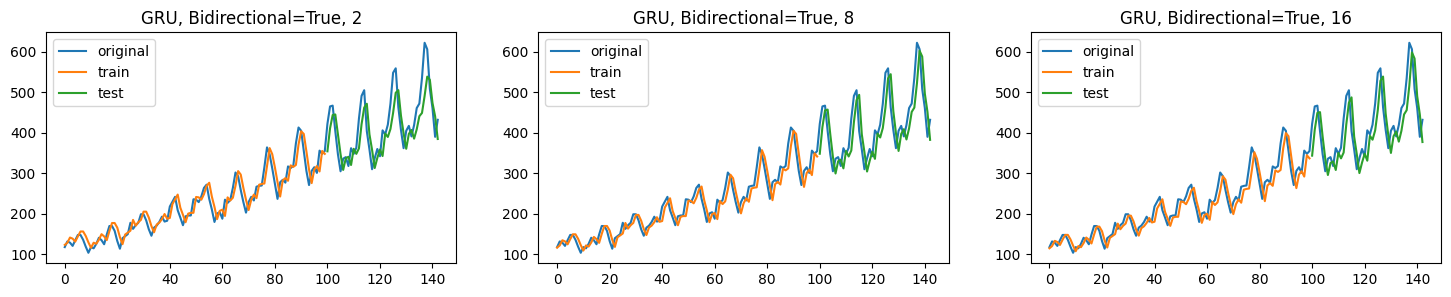

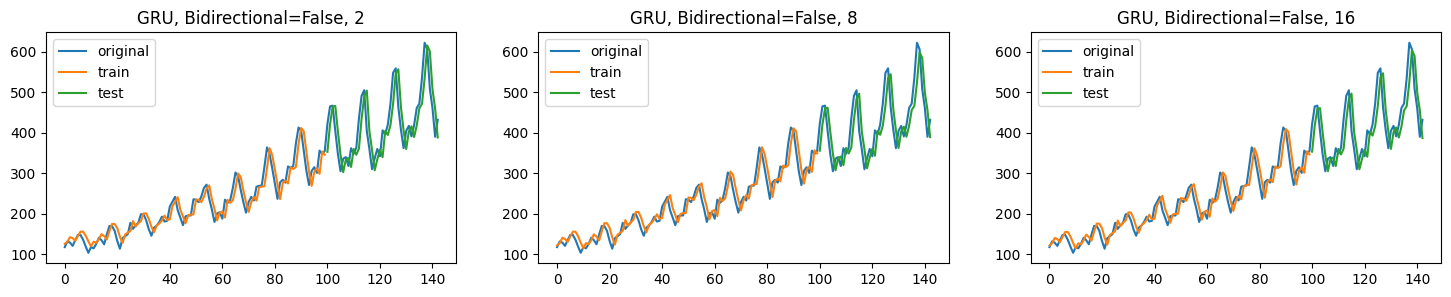

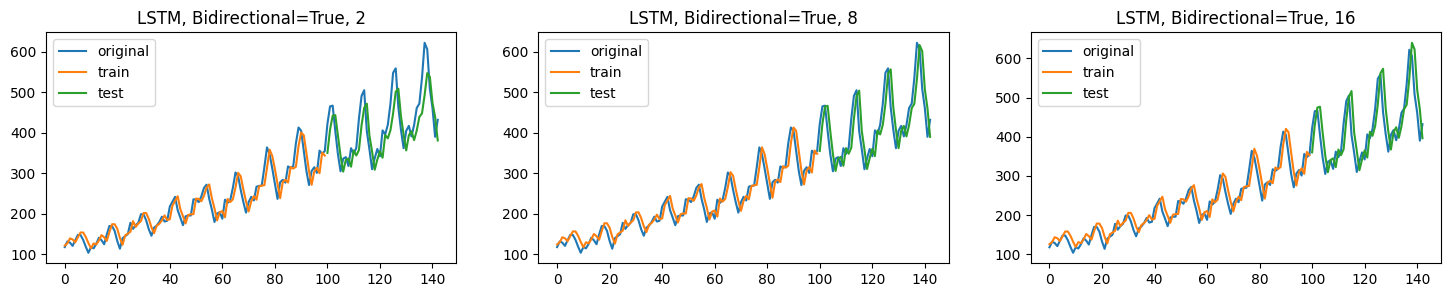

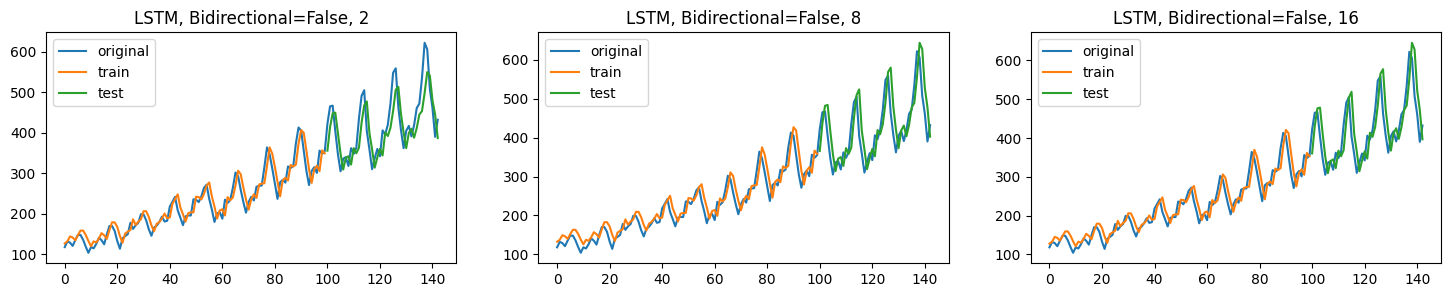

In [28]:
for cell, dl in results.items():
    for bdr, d2, in dl.items():
        plt.figure(figsize=(18,3))
        for i, (units, metrics) in enumerate(d2.items()):
            
            plt.subplot(1, len(d2), i+1)
            plt.plot(renormalize(df['Passengers2'].values), label='original')
            plt.plot(renormalize(metrics['train_pred']), label='train')
            plt.plot(range(thr, len(df)), renormalize(metrics['test_pred']), label='test')
            
            plt.title(f'{cell}, {bdr}, {units}')
            plt.legend()

        plt.show()

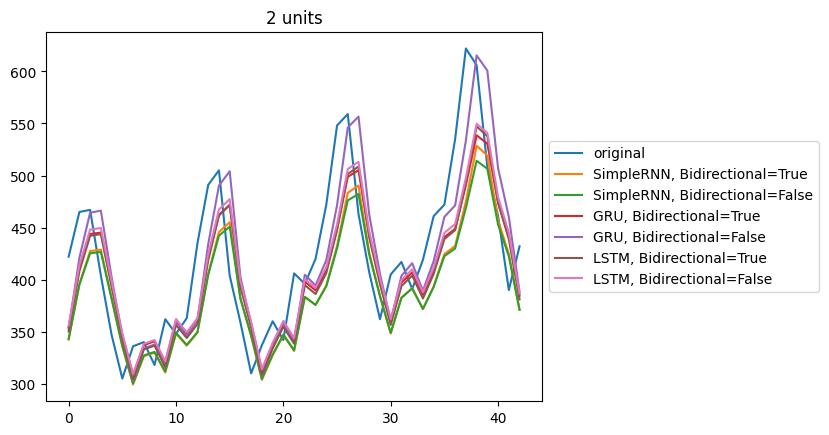

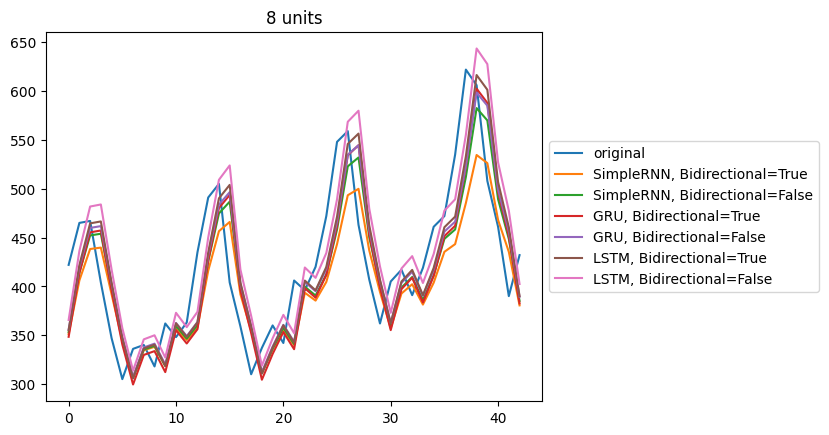

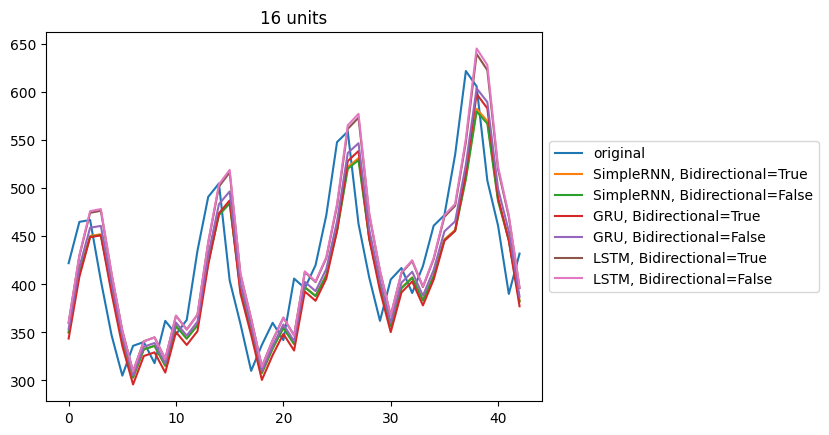

In [29]:
for i, units in enumerate([2, 8, 16]):
    plt.plot(renormalize(test_Y), label='original')
    for cell, d1 in results.items():
        for bdr, d2 in d1.items():

            plt.plot(renormalize(d2[units]['test_pred']), label=f'{cell}, {bdr}')
            plt.title(f'{units} units')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()